In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("C:/Users/Akif/Desktop/football/rankingv5v2.csv")

features = [
    'home_team_points', 'away_team_points', 'home_attack_value',
    'away_attack_value', 'home_midfield_value', 'away_midfield_value',
    'home_defender_value', 'away_defender_value', 'home_goalkeeper_value',
    'away_goalkeeper_value', 'home_total_market_value', 'away_total_market_value',
    'home_power_score', 'away_power_score'
]

X = data[features]
y = data['result']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [21]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\Akif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Akif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Akif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Akif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [22]:
best_model = grid.best_estimator_

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f'Cross-validated R^2 score: {cv_scores.mean()}')

Cross-validated R^2 score: 0.5280262004229203


C:\Users\Akif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Akif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Akif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Akif\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.

In [23]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5387310955367023


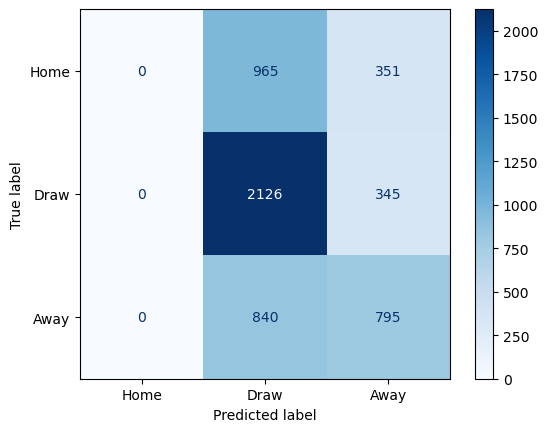

In [29]:
# Confusion Matrix and its Display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Home', 'Draw', 'Away'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

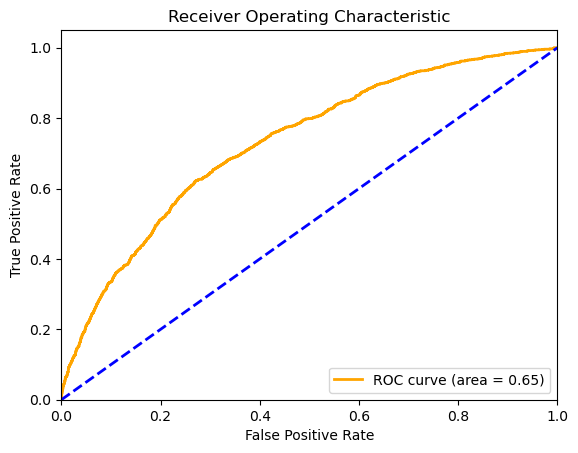

In [25]:
# ROC Curve and AUC
y_prob = best_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 2], pos_label=2)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovo')
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

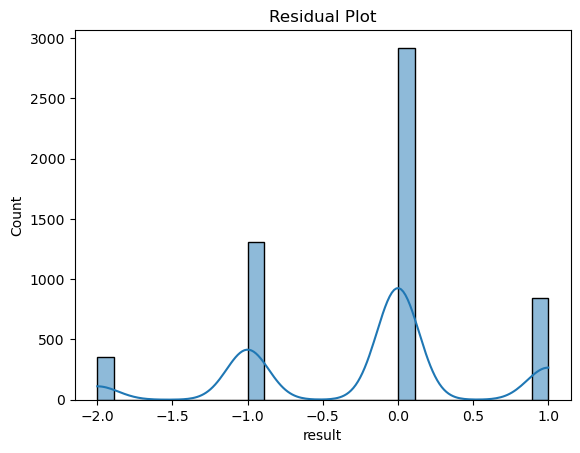

In [26]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residual Plot')
plt.show()

In [30]:
def predict_match(home_team_id, away_team_id, data, model, scaler):
    match_data = data[
        (data['home_club_id'] == home_team_id) & 
        (data['away_club_id'] == away_team_id)
    ].iloc[0]

    input_data = pd.DataFrame({
        'home_team_points': [match_data['home_team_points']],
        'away_team_points': [match_data['away_team_points']],
        'home_attack_value': [match_data['home_attack_value']],
        'away_attack_value': [match_data['away_attack_value']],
        'home_midfield_value': [match_data['home_midfield_value']],
        'away_midfield_value': [match_data['away_midfield_value']],
        'home_defender_value': [match_data['home_defender_value']],
        'away_defender_value': [match_data['away_defender_value']],
        'home_goalkeeper_value': [match_data['home_goalkeeper_value']],
        'away_goalkeeper_value': [match_data['away_goalkeeper_value']],
        'home_total_market_value': [match_data['home_total_market_value']],
        'away_total_market_value': [match_data['away_total_market_value']],
        'home_power_score': [match_data['home_power_score']],
        'away_power_score': [match_data['away_power_score']],
    })

    input_data_scaled = scaler.transform(input_data)
    prediction_proba = model.predict_proba(input_data_scaled)

    home_win_proba = prediction_proba[0][1]
    draw_proba = prediction_proba[0][0]
    away_win_proba = prediction_proba[0][2]

    print(f"Prediction Probabilities:\nHome Win: {home_win_proba:.2f}\nDraw: {draw_proba:.2f}\nAway Win: {away_win_proba:.2f}")

    # Determine the most likely outcome
    if home_win_proba > draw_proba and home_win_proba > away_win_proba:
        print("Predicted Outcome: Home Win")
    elif away_win_proba > draw_proba and away_win_proba > home_win_proba:
        print("Predicted Outcome: Away Win")
    else:
        print("Predicted Outcome: Draw")

In [35]:
home_team_id = 969
away_team_id = 40

predict_match(home_team_id, away_team_id, data, best_model, scaler);

Prediction Probabilities:
Home Win: 0.47
Draw: 0.27
Away Win: 0.25
Predicted Outcome: Home Win


C:\Users\Akif\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
1 2 1